In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
data = pd.read_csv('all_data.csv')
print(data)

     Country  Year  Life expectancy at birth (years)           GDP
0      Chile  2000                              77.3  7.786093e+10
1      Chile  2001                              77.3  7.097992e+10
2      Chile  2002                              77.8  6.973681e+10
3      Chile  2003                              77.9  7.564346e+10
4      Chile  2004                              78.0  9.921039e+10
..       ...   ...                               ...           ...
91  Zimbabwe  2011                              54.9  1.209845e+10
92  Zimbabwe  2012                              56.6  1.424249e+10
93  Zimbabwe  2013                              58.0  1.545177e+10
94  Zimbabwe  2014                              59.2  1.589105e+10
95  Zimbabwe  2015                              60.7  1.630467e+10

[96 rows x 4 columns]


In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None


In [4]:
data.rename(columns={'Life expectancy at birth (years)': 'life_expectancy_at_birth'}, inplace = True)
data.Country = data.Country.str.replace('United States of America', 'USA')

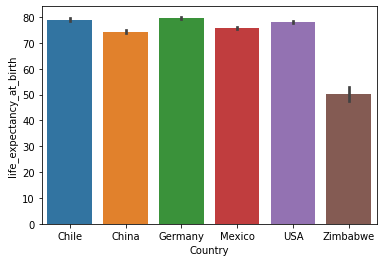

<Figure size 432x288 with 0 Axes>

In [5]:
sns.barplot(data=data, x='Country', y='life_expectancy_at_birth')
plt.show()
plt.clf()


In [6]:
print(data.Country.unique())
print(data.Year.unique())

['Chile' 'China' 'Germany' 'Mexico' 'USA' 'Zimbabwe']
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


In [7]:
chile_data = data[data.Country == 'Chile']
china_data = data[data.Country == 'China']
germany_data = data[data.Country == 'Germany']
mexico_data = data[data.Country == 'Mexico']
usa_data = data[data.Country == 'USA']
zimbabwe_data = data[data.Country == 'Zimbabwe']

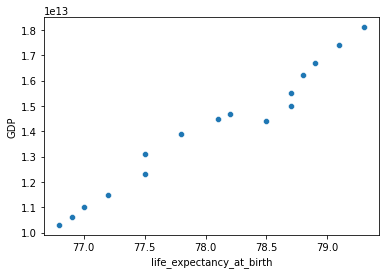

In [8]:
sns.scatterplot(x='life_expectancy_at_birth', y='GDP', data=usa_data)
plt.show()

In [9]:
model = sm.OLS.from_formula('life_expectancy_at_birth ~ GDP', usa_data)
results = model.fit()
print(results.params)

Intercept    7.333357e+01
GDP          3.359806e-13
dtype: float64


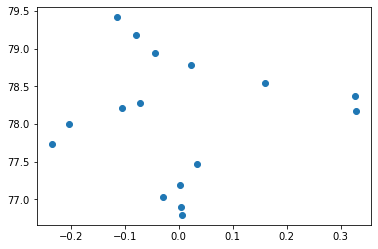

(array([2., 0., 4., 2., 5., 0., 1., 0., 0., 2.]),
 array([-0.23491889, -0.17859637, -0.12227385, -0.06595133, -0.00962882,
         0.0466937 ,  0.10301622,  0.15933874,  0.21566126,  0.27198378,
         0.3283063 ]),
 <a list of 10 Patch objects>)

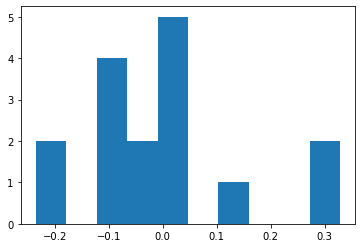

In [10]:
fitted_values = results.predict(usa_data)
residuals = usa_data.life_expectancy_at_birth - fitted_values
plt.scatter(residuals, fitted_values)
plt.show()
plt.clf()

plt.hist(residuals)
##Would need to look at data from more years - maybe investigate this just with usa data
##Although the residuals look normally distributed, the scatter plot (whats the word for this test) pattern implies after a certain point the GDP no longer effects life expectancy 
#try lag plot to see how GDP changes over time have less of an effect on life expectancy, is there really a relationship? Where is the cutoff

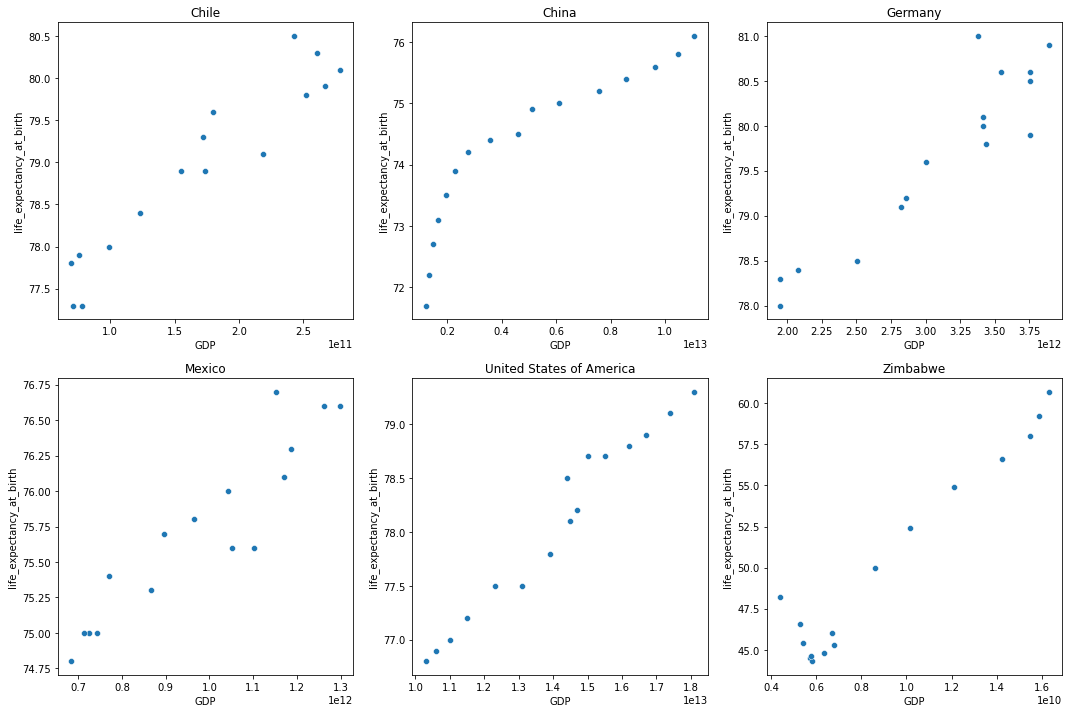

<Figure size 432x288 with 0 Axes>

In [11]:
plt.figure(figsize=(18,12))
ax1=plt.subplot(231)
sns.scatterplot(x='GDP', y='life_expectancy_at_birth', data=chile_data)
plt.title('Chile')

ax2=plt.subplot(232)
sns.scatterplot(x='GDP', y='life_expectancy_at_birth', data=china_data)
plt.title('China')

ax3=plt.subplot(233)
sns.scatterplot(x='GDP', y='life_expectancy_at_birth', data=germany_data)
plt.title('Germany')

ax4=plt.subplot(234)
sns.scatterplot(x='GDP', y='life_expectancy_at_birth', data=mexico_data)
plt.title('Mexico')
                
ax5=plt.subplot(235)
sns.scatterplot(x='GDP', y='life_expectancy_at_birth', data=usa_data)
plt.title('United States of America')
                
ax6=plt.subplot(236)
sns.scatterplot(x='GDP', y='life_expectancy_at_birth', data=zimbabwe_data)
plt.title('Zimbabwe')
                
plt.show()
plt.clf()

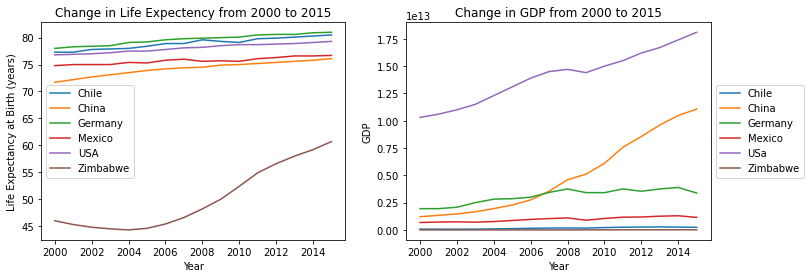

<Figure size 432x288 with 0 Axes>

In [12]:
plt.figure(figsize=(12,4))
ax1 = plt.subplot(121)
sns.lineplot(x='Year', y='life_expectancy_at_birth', data=chile_data, label='Chile')
sns.lineplot(x='Year', y='life_expectancy_at_birth', data=china_data, label='China')
sns.lineplot(x='Year', y='life_expectancy_at_birth', data=germany_data, label='Germany')
sns.lineplot(x='Year', y='life_expectancy_at_birth', data=mexico_data, label='Mexico')
sns.lineplot(x='Year', y='life_expectancy_at_birth', data=usa_data, label='USA')
sns.lineplot(x='Year', y='life_expectancy_at_birth', data=zimbabwe_data, label='Zimbabwe') 
ax1.set_ylabel('Life Expectancy at Birth (years)')
plt.legend()
plt.title('Change in Life Expectency from 2000 to 2015')

ax2 = plt.subplot(122)
sns.lineplot(x='Year', y="GDP", data=chile_data, label='Chile')
sns.lineplot(x='Year', y="GDP", data=china_data, label='China')
sns.lineplot(x='Year', y="GDP", data=germany_data, label='Germany')
sns.lineplot(x='Year', y="GDP", data=mexico_data, label='Mexico')
sns.lineplot(x='Year', y="GDP", data=usa_data, label='USa')
sns.lineplot(x='Year', y="GDP", data=zimbabwe_data, label='Zimbabwe')
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Change in GDP from 2000 to 2015')


plt.show()
plt.clf()

After examining the data I would conclude that while the there does seem to be a relationship between the GDP and life expectency I would argure that it depends more on a global GDP. Chile is shown to have one of the highest average life expectancies over the analyzed time frame yet has had minimal changes to its GDP over the same period. Zimbabwe has seen life exectency increase from 44 to almost 61 year (39% increase) while the GDP of Zimbabwe increased by less than 3%. Overall GDP is not an accurate estimator for life expectancy and many other factors would need to be studied to get any valuable insights. It would also appear from studying the GDP/life expectancy relationship in the US that there would be a certain point at which GDP would continue to increase without any affect on life expectancy. 

In [13]:
print(np.min(data.life_expectancy_at_birth[data.Country == 'Zimbabwe']))
print(np.max(data.life_expectancy_at_birth[data.Country == 'Zimbabwe']))

44.3
60.7


In [15]:
print(np.min(data.GDP[data.Country == 'Zimbabwe']))
print(np.max(data.GDP[data.Country == 'Zimbabwe']))

4415702800.0
16304667807.0


In [17]:
16304667807.0 -4415702800.0

11888965007.0

In [18]:
11888965007/4415702800

2.692428713046539